<a href="https://colab.research.google.com/github/ayanrasulova/undergrad_ml_assignments/blob/main/01_assignment_wrangling_and_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 1: Wrangling and EDA
### Foundations of Machine Learning

**Q1.** This question provides some practice cleaning variables which have common problems.
1. Numeric variable: For `airbnb_NYC.csv`, clean the `Price` variable as well as you can, and explain the choices you make. How many missing values do you end up with? (Hint: What happens to the formatting when a price goes over 999 dollars, say from 675 to 1,112?)
2. Categorical variable: For the Minnesota police use of for data, `mn_police_use_of_force.csv`, clean the `subject_injury` variable, handling the NA's; this gives a value `Yes` when a person was injured by police, and `No` when no injury occurred. What proportion of the values are missing? Cross-tabulate your cleaned `subject_injury` variable with the `force_type` variable. Are there any patterns regarding when the data are missing? For the remaining missing values, replace the `np.nan/None` values with the label `Missing`.
3. Dummy variable: For `metabric.csv`, convert the `Overall Survival Status` variable into a dummy/binary variable, taking the value 0 if the patient is deceased and 1 if they are living.
4. Missing values: For `airbnb_NYC.csv`, determine how many missing values of `Review Scores Rating` there are. Create a new variable, in which you impute the median score for non-missing observations to the missing ones. Why might this bias or otherwise negatively impact your results?

In [1]:
import urllib.request
import os
import zipfile
import os

def download_data(force=False):
    """Download and extract course data from Zenodo."""

    zip_path = 'data.zip'
    data_dir = './data'

    if not os.path.exists(zip_path) or force:
        print("Downloading course data...")
        urllib.request.urlretrieve(
            'https://zenodo.org/records/18235955/files/data.zip?download=1',
            zip_path
        )
        print("Download complete")

    if not os.path.exists(data_dir) or force:
        print("Extracting data files...")
        with zipfile.ZipFile(zip_path, 'r') as zip_ref:
            zip_ref.extractall(data_dir)
        print("Data extracted")

    return data_dir


if __name__ == "__main__":
    download_data()

Download complete
Extracting data files...
Data extracted


In [4]:
import pandas as pd
import numpy as np

df = pd.read_csv('data/airbnb_NYC.csv', encoding='latin1')

# print(df["Price"].unique())

df['Price'] = df['Price'].str.replace(',','') # Gets rid of the comma by replacing it with nothing (''), and sets df['Price'] to the updated value

# Question 1.1: Because the formatting of the price includes commas when the price is > 1000, it is detected as an object type. The missing values will be for prices over 999 dollars, as there is a comma.

In [5]:
# Question 1.2
df = pd.read_csv('data/mn_police_use_of_force.csv', encoding='latin1')

df['subject_injury']
missing = df['subject_injury'].isna().mean() # Checks mean of the proportion of NA values
print(missing) # 76% of the values are missing

df['subject_injury_clean'] = ( # Cleaning subject_Injury
    df['subject_injury']
    .astype(str)
    .str.strip()
    .str.title()
    .replace({'Nan': np.nan})
)

pd.crosstab(
    df['subject_injury_clean'],
    df['force_type'],
    dropna=False
)

# After cross tabulating, we can see that missing data with less lethal force and maximal restraint techniques, as 100% of less lethal & maximal restraint technique variables are marked with "Missing"

df['subject_injury_final'] = df['subject_injury_clean'].fillna("Missing") # Replacing empty space with "Missing"
pd.crosstab(
    df['subject_injury_final'],
    df['force_type']
)

0.7619342359767892


force_type,Baton,Bodily Force,Chemical Irritant,Firearm,Gun Point Display,Improvised Weapon,Less Lethal,Less Lethal Projectile,Maximal Restraint Technique,Police K9 Bite,Taser
subject_injury_final,,,,,,,,,,,
Missing,2,7051,1421,0,27,74,87,0,170,31,985
No,0,1093,131,2,33,34,0,1,0,2,150
Yes,2,1286,41,0,44,40,0,2,0,44,172


In [6]:
# Question 1.3
df = pd.read_csv('data/metabric.csv', encoding='latin1')

df["survival_binary"] = df["Overall Survival Status"].map({
    "1:DECEASED": 0, # maps to 0 if deceased and vice versa
    "0:LIVING": 1
})

df[["Overall Survival Status", "survival_binary"]].head() # print head to check


,Overall Survival Status,survival_binary
0,0:LIVING,1
1,1:DECEASED,0
2,0:LIVING,1
3,1:DECEASED,0
4,1:DECEASED,0


In [7]:
df = pd.read_csv('data/airbnb_NYC.csv', encoding='latin1')
df[["Review Scores Rating"]].head()

df['Review Scores Rating']
missing = df['Review Scores Rating'].isna().sum() # Checks total sum of the NA values
print(missing) # 8323 values are missing

median = df['Review Scores Rating'].median()
print(median) # Median of the non-missing values is 94

# Imputing
df["review_score_median_imputed"] = df["Review Scores Rating"].fillna(median)

# Question 1.4: This could bias or negatively impact the results because it is essentially making the spread of the data smaller, because it is artifically impacting the mean to be closer to the  median

8323
94.0


**Q2.** Go to https://sharkattackfile.net/ and download their dataset on shark attacks.

1. Open the shark attack file using Pandas. It is probably not a csv file, so `read_csv` won't work. What does work?
2. Drop any columns that do not contain data.
3. What is an observation? Carefully justify your answer, and explain how it affects your choices in cleaning and analyzing the data.
4. Clean the year variable. Describe the range of values you see. Filter the rows to focus on attacks since 1940. Are attacks increasing, decreasing, or remaining constant over time?
5. Clean the Age variable and make a histogram of the ages of the victims.
6. Clean the `Type` variable so it only takes three values: Provoked and Unprovoked and Unknown. What proportion of attacks are unprovoked?
7. Clean the `Fatal Y/N` variable so it only takes three values: Y, N, and Unknown.
8. Is the attack more or less likely to be fatal when the attack is provoked or unprovoked? Thoughts?

In [10]:
import pandas as pd
import numpy as np
df = pd.read_excel('GSAF5.xls')
#2.1 - used read_excel instead of read_csv

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7073 entries, 0 to 7072
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            7073 non-null   object 
 1   Year            7071 non-null   float64
 2   Type            7055 non-null   object 
 3   Country         7023 non-null   object 
 4   State           6586 non-null   object 
 5   Location        6506 non-null   object 
 6   Activity        6490 non-null   object 
 7   Name            6855 non-null   object 
 8   Sex             6495 non-null   object 
 9   Age             4079 non-null   object 
 10  Injury          7038 non-null   object 
 11  Fatal Y/N       6512 non-null   object 
 12  Time            3546 non-null   object 
 13  Species         3942 non-null   object 
 14  Source          7053 non-null   object 
 15  pdf             6799 non-null   object 
 16  href formula    6794 non-null   object 
 17  href            6796 non-null   o

In [12]:
df = df.dropna(axis=0, how='all') #drop row if all values are missing
#2.2 dropped columns if missing values

2.3 An observation is a single shark attack incident, where each row represents one recorded shark encounter

In [13]:
import pandas as pd
df = pd.read_excel('/content/GSAF5.xls')
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')

In [14]:
#2.4 Printing Ranges
print("Min year:", df['Year'].min())
print("Max year:", df['Year'].max())
df_recent = df[df['Year'] >= 1940]
print("Attacks since 1940:", len(df_recent))


Min year: 0.0
Max year: 2026.0
Attacks since 1940: 5537


<Axes: xlabel='Year'>

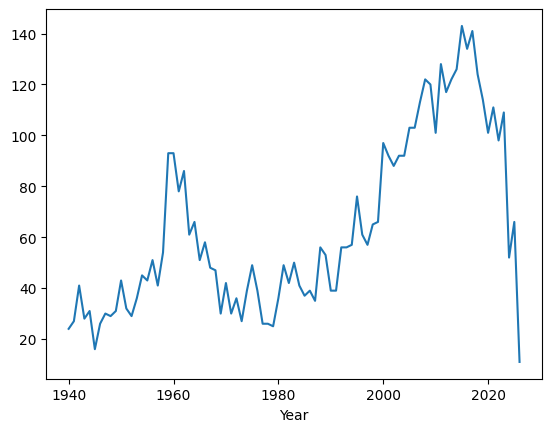

In [15]:
attacks_per_year = df_recent['Year'].value_counts().sort_index()
attacks_per_year.plot()

#Attacks have generally increased over time, especially from 1980-2020. However at 2020, there is a noticeably significant drop.
#Perhaps this downward trend after 2020 has something to do with the global coronavirus pandemic


In [17]:
df_recent['Age'] = pd.to_numeric(df_recent['Age'], errors='coerce')


/tmp/ipython-input-3275722888.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_recent['Age'] = pd.to_numeric(df_recent['Age'], errors='coerce')


In [18]:
df_recent['Age'].isna().mean()



np.float64(0.346035759436518)

<Axes: >

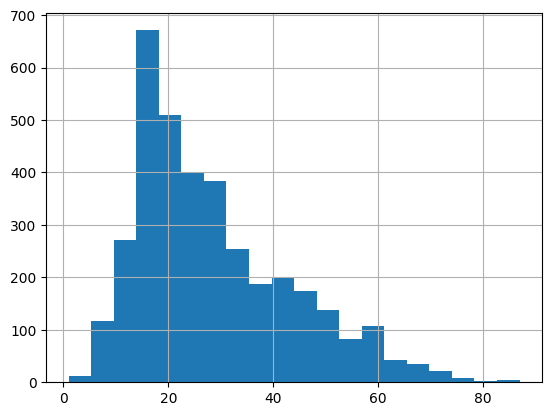

In [19]:
df_recent['Age'].hist(bins=20)
#2.5 Most victims seem to be in their 20s to 30s, which makes sense as these are generally the most active adult years in a human life


In [20]:
#2.6 clean by type (provoked, unprovoked, unknown)
df_recent['Type'] = df_recent['Type'].astype(str).str.strip().str.title()

def clean_type(type_val):
    if 'Provoked' in type_val:
        return 'Provoked'
    elif 'Unprovoked' in type_val:
        return 'Unprovoked'
    else:
        return 'Unknown'

df_recent['Type'] = df_recent['Type'].apply(clean_type)

print(df_recent['Type'].value_counts())

Type
Unprovoked    4125
Unknown        889
Provoked       523
Name: count, dtype: int64


/tmp/ipython-input-2460292647.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_recent['Type'] = df_recent['Type'].astype(str).str.strip().str.title()
/tmp/ipython-input-2460292647.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_recent['Type'] = df_recent['Type'].apply(clean_type)


In [21]:
unprovoked_count = df_recent['Type'].value_counts().get('Unprovoked', 0)
total_attacks = df_recent['Type'].value_counts().sum()

if total_attacks > 0:
    proportion_unprovoked = unprovoked_count / total_attacks
    print(f"Proportion of unprovoked attacks: {proportion_unprovoked:.2f}")
else:
    print("No attacks recorded to calculate the proportion.")

Proportion of unprovoked attacks: 0.74


In [22]:
#2.7 Clean by Fatal Y/N (Y, N, unknown)
df_recent['Fatal Y/N'] = df_recent['Fatal Y/N'].astype(str).str.strip().str.title()

def clean_type(type_val):
    if 'Y' in type_val:
        return 'Y'
    elif 'N' in type_val:
        return 'N'
    else:
        return 'Unknown'

df_recent['Fatal Y/N'] = df_recent['Fatal Y/N'].apply(clean_type)

print(df_recent['Fatal Y/N'].value_counts())

Fatal Y/N
N          4652
Y           831
Unknown      54
Name: count, dtype: int64


/tmp/ipython-input-3850618061.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_recent['Fatal Y/N'] = df_recent['Fatal Y/N'].astype(str).str.strip().str.title()
/tmp/ipython-input-3850618061.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_recent['Fatal Y/N'] = df_recent['Fatal Y/N'].apply(clean_type)


In [25]:
crosstab_fatal_type = pd.crosstab(df_recent['Type'], df_recent['Fatal Y/N'])
print("Attack Type and Fatal Y/N:")
print(crosstab_fatal_type)

# Calculate proportions of fatal attacks for each type and sum to get total
crosstab_proportions = crosstab_fatal_type.div(crosstab_fatal_type.sum(axis=1), axis=0)

print("\nProportion of Fatal Attacks by Type:")
print(crosstab_proportions)

Attack Type and Fatal Y/N:
Fatal Y/N      N  Unknown    Y
Type                          
Provoked     505        5   13
Unknown      756        9  124
Unprovoked  3391       40  694

Proportion of Fatal Attacks by Type:
Fatal Y/N          N   Unknown         Y
Type                                    
Provoked    0.965583  0.009560  0.024857
Unknown     0.850394  0.010124  0.139483
Unprovoked  0.822061  0.009697  0.168242


2.8 An attack is much more likely to be fatal when it is unprovoked. As the table above shows, the unprovoked fatality rate is 16.8% and the provoked fatality rate is 2.5%. The ratio of unprovoked fatalities to provoked is 0.168/0.0249 = 6.7. Thus, it is nearly 7 times more likely to be fatal than provoked attacks.

**Q3.** Open the "tidy_data.pdf" document available in `https://github.com/ds4e/wrangling`, which is a paper called *Tidy Data* by Hadley Wickham.

  1. Read the abstract. What is this paper about?
     
     The paper is about data tidying.

  2. Read the introduction. What is the "tidy data standard" intended to accomplish?

      It's a way to filter and organize data with multiple data analysis tools rather than starting from scratch with each new dataset.

  3. Read the intro to section 2. What does this sentence mean: "Like families, tidy datasets are all alike but every messy dataset is messy in its own way." What does this sentence mean: "For a given dataset, it’s usually easy to figure out what are observations and what are variables, but it is surprisingly difficult to precisely define variables and observations in general."

      The first sentence means that tidy data is well organized with variables in columns, observations in rows, etc. whereas messy data can be complicated to understand because it doesn't follow standard rules of organization.

      The second sentence means that things that are variable in one dataset may be observations in another one based on the intent of the data and the way that it's organized. It varies based on context and on what is being analyzed with the data.


  4. Read Section 2.2. How does Wickham define values, variables, and observations?

      Values are the entries in a dataset that can be either quantitative or qualitative. Each value or cell is belongs to one variable (column) and one row (observation).

      Variables describe what is being measured and are consistent across every observation.

      Observations are values that are measured on the same unit i.e. one person, one car, etc. depending on the data.

  5. How is "Tidy Data" defined in section 2.3?

      A dataset needs to meet three conditions to be considered tidy. Every variable needs its own column, every observation needs its own row, and each unit has its own table.

  6. Read the intro to Section 3 and Section 3.1. What are the 5 most common problems with messy datasets? Why are the data in Table 4 messy? What is "melting" a dataset?

      1. Column headers are values, not variable names
      2. Multiple variables are stored in one column
      3. Variables are stored in both rows and columns
      4. Multiple types of observational units are stored in the same table
      5. A single observational unit is stored in multiple tables

      The data in table 4 is messy because the income values are column headers rather than income being a variable itself.

      Melting a dataset turns columns that represent values into rows so it meets that standard of tidy data.

  7. Why, specifically, is table 11 messy but table 12 tidy and "molten"?

      Table 11 is messy for several reasons — the day variable is spread across multiple columns, the column names are values instead of variables (d1 instead of day), and the element column contains variables instead of values.

      Table 12 is tidy because each variable became a column and each observation (each day) became a row.


**Q4.** This question looks at financial transfers from international actors to American universities. In particular, from which countries and giftors are the gifts coming from, and to which institutions are they going?

For this question, `.groupby([vars]).count()` and `.groupby([vars]).sum()` will be especially useful to tally the number of occurrences and sum the values of those occurrences.

In [ ]:
#4.1 Load the `ForeignGifts_edu.csv` dataset.
import pandas as pd
import numpy as np

gift = pd.read_csv('data/ForeignGifts_edu.csv')
gift.head(10)

,ID,OPEID,Institution Name,City,State,Foreign Gift Received Date,Foreign Gift Amount,Gift Type,Country of Giftor,Giftor Name
0,1,102000,Jacksonville State University,Jacksonville,AL,43738,250000,Monetary Gift,CHINA,NaN
1,2,104700,Troy University,Troy,AL,43592,463657,Contract,CHINA,Confucius Institute Headquarters
2,3,105100,University of Alabama,Tuscaloosa,AL,43466,3649107,Contract,ENGLAND,Springer Nature Customer Service Ce
3,4,105100,University of Alabama,Tuscaloosa,AL,43472,1000,Contract,SAUDI ARABIA,Saudi Arabia Education Mission
4,5,105100,University of Alabama,Tuscaloosa,AL,43479,49476,Contract,SAUDI ARABIA,Saudi Arabia Education Mission
5,6,105100,University of Alabama,Tuscaloosa,AL,43501,30231,Contract,KUWAIT,Kuwait-Embassy of the State
6,7,105100,University of Alabama,Tuscaloosa,AL,43507,30162,Contract,KUWAIT,Kuwait-Embassy of the State
7,8,105100,University of Alabama,Tuscaloosa,AL,43517,200,Monetary Gift,GERMANY,"Mercedes-Benz U.S. International, I"
8,9,105100,University of Alabama,Tuscaloosa,AL,43529,5136,Contract,SAUDI ARABIA,Saudi Arabia Education Mission
9,10,105100,University of Alabama,Tuscaloosa,AL,43531,57049,Contract,JAPAN,Kansai Gaidai University (KGU)


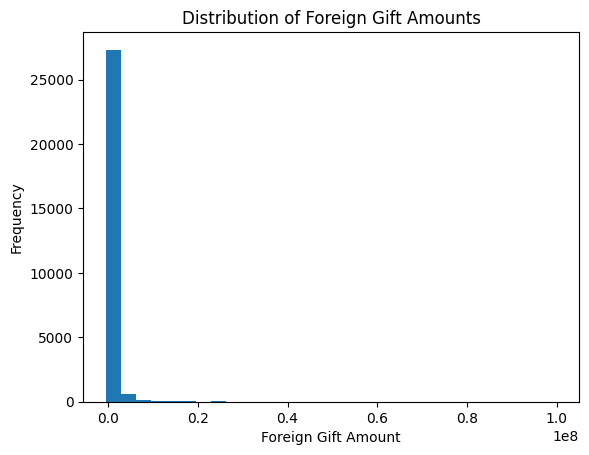

In [ ]:
#4.2 For `Foreign Gift Amount`, create a histogram and describe the variable. Describe your findings.
import matplotlib.pyplot as plt

plt.hist(gift['Foreign Gift Amount'], bins=30)
plt.xlabel('Foreign Gift Amount')
plt.ylabel('Frequency')
plt.title('Distribution of Foreign Gift Amounts')
plt.show()
# Findings:
# The histogram shows that the majority of foreign gift amounts are relatively low, with a long tail extending to higher amounts.

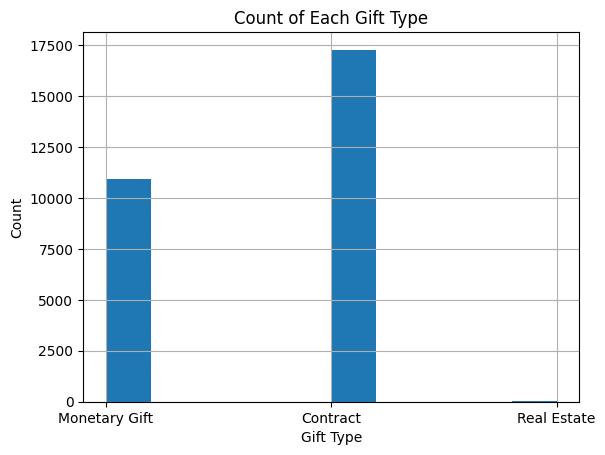

Gift Type
Contract         0.612097
Monetary Gift    0.387513
Real Estate      0.000390
Name: count, dtype: float64


In [ ]:
#4.3 For `Gift Type`, create a histogram or value counts table. What proportion of the gifts are contracts, real estate, and monetary gifts?
gift['Gift Type'].hist()
plt.xlabel('Gift Type')
plt.ylabel('Count')
plt.title('Count of Each Gift Type')
plt.show()

# Calculate proportions
gift_type_counts = gift['Gift Type'].value_counts()
proportions = gift_type_counts / len(gift)
print(proportions)

In [ ]:
# 4.4.1 What are the top 15 countries in terms of the number of gifts?
top_countries_count = gift['Country of Giftor'].value_counts()
print("Top 15 countries in terms of the number of gifts:")
top_countries_count.head(15)

Top 15 countries in terms of the number of gifts:


Country of Giftor
ENGLAND            3655
CHINA              2461
CANADA             2344
JAPAN              1896
SWITZERLAND        1676
SAUDI ARABIA       1610
FRANCE             1437
GERMANY            1394
HONG KONG          1080
SOUTH KOREA         811
QATAR               693
THE NETHERLANDS     512
KOREA               452
INDIA               434
TAIWAN              381
Name: count, dtype: int64

In [ ]:
#4.4.2  What are the top 15 countries in terms of the amount given?
gift['Foreign Gift Amount'] = pd.to_numeric(gift['Foreign Gift Amount'], errors='coerce')
top_countries_amount = gift.groupby('Country of Giftor')['Foreign Gift Amount'].sum().sort_values(ascending=False)
print("Top 15 countries in terms of the amount given:")
top_countries_amount.head(15)

Top 15 countries in terms of the amount given:


Country of Giftor
QATAR                   2706240869
ENGLAND                 1464906771
CHINA                   1237952112
SAUDI ARABIA            1065205930
BERMUDA                  899593972
CANADA                   898160656
HONG KONG                887402529
JAPAN                    655954776
SWITZERLAND              619899445
INDIA                    539556490
GERMANY                  442475605
UNITED ARAB EMIRATES     431396357
FRANCE                   405839396
SINGAPORE                401157692
AUSTRALIA                248409202
Name: Foreign Gift Amount, dtype: int64

In [ ]:
#4.5 What are the top 15 institutions in terms of the total amount of money they receive? Make a histogram of the total amount received by all institutions.
import plotly.express as px
top_institutions_amount = gift.groupby('Institution Name')['Foreign Gift Amount'].sum().sort_values(ascending=False)
print("Top 15 institutions in terms of the total amount received:")
print(top_institutions_amount.head(15))

px.histogram(top_institutions_amount.reset_index(), x='Foreign Gift Amount', y="Institution Name", title='Distribution of Total Amount Received by Institutions')

Top 15 institutions in terms of the total amount received:
Institution Name
Carnegie Mellon University                       1477922504
Cornell University                               1289937761
Harvard University                                954803610
Massachusetts Institute of Technology             859071692
Yale University                                   613441311
Texas A&M University                              521455050
Johns Hopkins University                          502409595
Northwestern University                           402316221
Georgetown University                             379950511
University of Chicago (The)                       364544338
University of Colorado Boulder                    360173159
Duke University                                   343699498
Brigham Young University                          323509863
Stanford University                               319561362
University of Texas MD Anderson Cancer Center     301527419
Name: Foreign Gift Amoun

In [ ]:
#4.6 Which giftors provide the most money, in total?
#Qatar Foundation gives the most money in total
top_giftors_amount = gift.groupby('Giftor Name')['Foreign Gift Amount'].sum().sort_values(ascending=False)
print("Top giftors in terms of the total amount given:")
top_giftors_amount.head(15)

Top giftors in terms of the total amount given:


Giftor Name
Qatar Foundation                       1166503744
Qatar Foundation/Qatar National Res     796197000
Qatar Foundation for Education          373945215
Anonymous                               338793629
Saudi Arabian Cultural Mission          275221475
HCL                                     190000000
Church of Jesus Christ of LDS           185203715
Emirates Institute for Advanced Sc      170641244
QIC                                     148355497
Anonymous #9                             96334996
Qatar National Research Fund             79021705
Government of Saudi Arabia               75192434
Contracting Party                        69996984
CMKL University                          67700000
Royal Embassy of Saudi Arabia            67062486
Name: Foreign Gift Amount, dtype: int64

**Q5.** This question provides some practice doing exploratory data analysis and visualization.

We'll use the `college_completion.csv` dataset from the US Department of Education. The "relevant" variables for this question are:
  - `level` - Level of institution (4-year, 2-year)
  - `aid_value` - The average amount of student aid going to undergraduate recipients
  - `control` - Public, Private not-for-profit, Private for-profit
  - `grad_100_value` - percentage of first-time, full-time, degree-seeking undergraduates who complete a degree or certificate program within 100 percent of expected time (bachelor's-seeking group at 4-year institutions)

In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
#5.1 Load the `college_completion.csv` data with Pandas.
schools = pd.read_csv("data/college_completion.csv")
schools.head(10)

,index,unitid,chronname,city,state,level,control,basic,hbcu,flagship,...,vsa_grad_after6_transfer,vsa_grad_elsewhere_after6_transfer,vsa_enroll_after6_transfer,vsa_enroll_elsewhere_after6_transfer,similar,state_sector_ct,carnegie_ct,counted_pct,nicknames,cohort_size
0,0,100654,Alabama A&M University,Normal,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,...,36.4,5.6,17.2,11.1,232937|100724|405997|113607|139533|144005|2285...,13,386,99.7|07,NaN,882.0
1,1,100663,University of Alabama at Birmingham,Birmingham,Alabama,4-year,Public,Research Universities--very high research acti...,NaN,NaN,...,NaN,NaN,NaN,NaN,196060|180461|201885|145600|209542|236939|1268...,13,106,56.0|07,UAB,1376.0
2,2,100690,Amridge University,Montgomery,Alabama,4-year,Private not-for-profit,Baccalaureate Colleges--Arts & Sciences,NaN,NaN,...,NaN,NaN,NaN,NaN,217925|441511|205124|247825|197647|221856|1353...,16,252,100.0|07,NaN,3.0
3,3,100706,University of Alabama at Huntsville,Huntsville,Alabama,4-year,Public,Research Universities--very high research acti...,NaN,NaN,...,0.0,0.0,0.0,0.0,232186|133881|196103|196413|207388|171128|1900...,13,106,43.1|07,UAH,759.0
4,4,100724,Alabama State University,Montgomery,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,...,NaN,NaN,NaN,NaN,100654|232937|242617|243197|144005|241739|2354...,13,386,88.0|07,ASU,1351.0
5,5,100751,University of Alabama at Tuscaloosa,Tuscaloosa,Alabama,4-year,Public,Research Universities--high research activity,NaN,X,...,61.5,8.5,6.3,5.5,183044|209551|240727|207388|178402|185828|2380...,13,96,75.9|07,NaN,4438.0
6,6,100760,Central Alabama Community College,Alexander City,Alabama,2-year,Public,Associates--Public Rural-serving Medium,NaN,NaN,...,NaN,NaN,NaN,NaN,217712|227225|198491|175935|107460|206923|2407...,25,289,66.7|10,NaN,594.0
7,7,100830,Auburn University at Montgomery,Montgomery,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,NaN,NaN,...,NaN,NaN,NaN,NaN,229814|210429|160038|176965|169798|207263|1023...,13,386,43.8|07,AUM,536.0
8,8,100858,Auburn University,Auburn University,Alabama,4-year,Public,Research Universities--high research activity,NaN,NaN,...,72.2,9.7,2.0,4.6,223232|204024|163268|165334|132903|171128|1961...,13,96,75.5|07,NaN,4165.0
9,9,100937,Birmingham-Southern College,Birmingham,Alabama,4-year,Private not-for-profit,Baccalaureate Colleges--Arts & Sciences,NaN,NaN,...,NaN,NaN,NaN,NaN,174747|153144|143084|152390|168591|199111|1406...,16,252,88.9|07,BSC,449.0


In [ ]:
#5.2 How many observations and variables are in the data? Use `.head()` to examine the first few rows of data.
print("Shape of the data:", schools.shape)
# There are 3798 observations and 63 variables in the data.

Shape of the data: (3798, 63)


In [ ]:
#5.3 Cross tabulate `control` and `level`. Describe the patterns you see in words.
pd.crosstab(schools['control'], schools['level'])
# From the cross tabulation, we can see that private nonprofit institutions are mostly 4-year colleges
#, while public institutions have a significant number of both 2-year and 4-year colleges

level,2-year,4-year
control,,
Private for-profit,465,527
Private not-for-profit,68,1180
Public,926,632


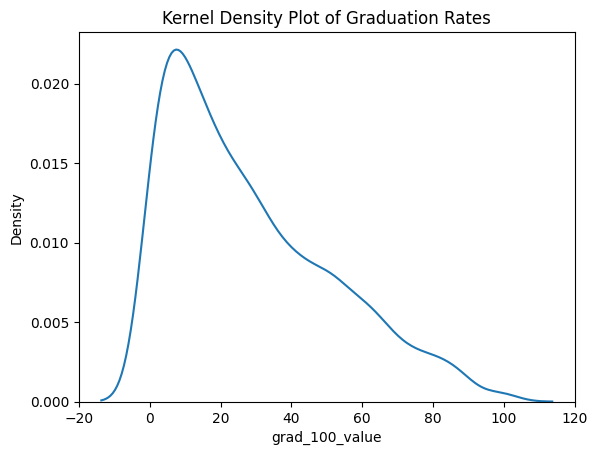

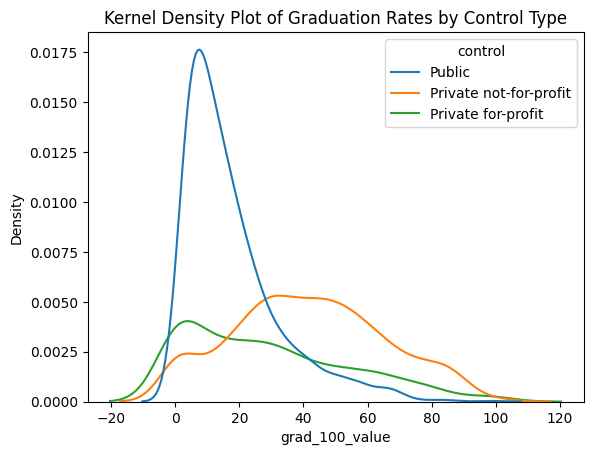

                         count       mean        std  min    25%   50%    75%  \
control                                                                         
Private for-profit       779.0  29.108858  25.601687  0.0   6.95  24.7  46.75   
Private not-for-profit  1189.0  41.660976  23.551231  0.0  25.00  41.0  58.30   
Public                  1499.0  17.430887  14.729443  0.0   6.90  13.2  23.25   

                          max  
control                        
Private for-profit      100.0  
Private not-for-profit  100.0  
Public                   97.8  


In [ ]:
#5.4. For `grad_100_value`, create a kernel density plot and describe table.
#Now condition on `control`, and produce a kernel density plot and describe tables for each type of institutional control.
# Which type of institution appear to have the most favorable graduation rates?
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
# Plot kernel density for grad_100_value
sns.kdeplot(data=schools, x='grad_100_value')
plt.title('Kernel Density Plot of Graduation Rates')
plt.show()
#grad_100_value is right skewed, with most values clustered around 0 to 40, and the graduation rates with most school is around 10.
# Plot kernel density for each control type
sns.kdeplot(data=schools, x='grad_100_value', hue='control')
plt.title('Kernel Density Plot of Graduation Rates by Control Type')
plt.show()
# Describe the tables for each control type
print(schools.groupby('control')['grad_100_value'].describe())
# Private nonprofit institutions appear to have the most favorable graduation rates, as their distribution is shifted to the right compared to public and private for-profit institutions.

In [ ]:
#5.5 Make a scatterplot of `grad_100_value` by `aid_value`
# , and compute the covariance and correlation between the two variables. Describe what you see.
# Now make the same plot and statistics, but conditioning on `control`.
# Describe what you see. For which kinds of institutions does aid seem to vary positively with graduation rates?

# Scatterplot of grad_100_value by aid_value
plot = px.scatter(schools, x='aid_value', y='grad_100_value', title='Scatterplot of Graduation Rate by Aid Value')
plot.update_layout(xaxis_title='Aid Value', yaxis_title='Graduation Rate (100%)')
plot.show()
#The plot shows a positive, moderate linear relationship especially when aid value is higher than 10k.

# Compute covariance and correlation (drop NaN values from both columns together)
data_clean = schools[['aid_value', 'grad_100_value']].dropna()
covariance = np.cov(data_clean['aid_value'], data_clean['grad_100_value'])[0, 1]
correlation = np.corrcoef(data_clean['aid_value'], data_clean['grad_100_value'])[0, 1]
print(f'Overall Covariance: {covariance:.2f}')
print(f'Overall Correlation: {correlation:.4f}')

# There is a positive correlation between aid value and graduation rates, indicating that higher aid values are associated with higher graduation rates.
# Now conditioning on control
plot = px.scatter(schools, x='aid_value', y='grad_100_value', color='control', title='Scatterplot of Graduation Rate by Aid Value and Control Type')
plot.update_layout(xaxis_title='Aid Value', yaxis_title='Graduation Rate (100%)')
plot.show()
# For private nonprofit institutions, there is a stronger positive correlation between aid value and graduation rates compared to public and private for-profit institutions.

Overall Covariance: 88610.48
Overall Correlation: 0.5759


**Q6.** In class, we talked about how to compute the sample mean of a variable $X$,
$$
m(X) = \dfrac{1}{N} \sum_{i=1}^N x_i
$$
and sample covariance of two variables $X$ and $Y$,
$$
\text{cov}(X,Y) = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))(y_i - m(Y))).
$$
Recall, the sample variance of $X$ is
$$
s^2 = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))^2.
$$
It can be very helpful to understand some basic properties of these statistics. If you want to write your calculations on a piece of paper, take a photo, and upload that to your GitHub repo, that's probably easiest.

We're going to look at **linear transformations** of $X$, $Y = a + bX$. So we take each value of $X$, $x_i$, and transform it as $y_i = a + b x_i$.

1. Show that $m(a + bX) = a+b \times m(X)$.
2. Show that $ \text{cov}(X,X) = s^2$.
3. Show that $\text{cov}(X,a+bY) = b \times \text{cov}(X,Y)$
4. Show that $\text{cov}(a+bX,a+bY) = b^2 \text{cov}(X,Y) $. Notice, this also means that $\text{cov}(bX, bX) = b^2 s^2$.
5. Suppose $b>0$ and let the median of $X$ be $\text{med}(X)$. Is it true that the median of $a+bX$ is equal to $a + b \times \text{med}(X)$? Is the IQR of $a + bX$ equal to $a + b \times \text{IQR}(X)$?
6. Show by example that the means of $X^2$ and $\sqrt{X}$ are generally not $(m(X))^2$ and $\sqrt{m(X)}$. So, the results we derived above really depend on the linearity of the transformation $Y = a + bX$, and transformations like $Y = X^2$ or $Y = \sqrt{X}$ will not behave in a similar way.

**Q7.** This question provides some practice doing exploratory data analysis and visualization.

We'll use the `ames_prices.csv` dataset. The "relevant" variables for this question are:
  - `price` - Sale price value of the house
  - `Bldg.Type` - Building type of the house (single family home, end-of-unit townhome, duplex, interior townhome, two-family conversion)

1. Load the `college_completion.csv` data with Pandas.
2. Make a kernel density plot of price and compute a describe table. Now, make a kernel density plot of price conditional on building type, and use `.groupby()` to make a describe type for each type of building. Which building types are the most expensive, on average? Which have the highest variance in transaction prices?
3. Make an ECDF plot of price, and compute the sample minimum, .25 quantile, median, .75 quantile, and sample maximum (i.e. a 5-number summary).
4. Make a boxplot of price. Are there outliers? Make a boxplot of price conditional on building type. What patterns do you see?
5. Make a dummy variable indicating that an observation is an outlier.
6. Winsorize the price variable, and compute a new kernel density plot and describe table. How do the results change?

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 7.1) Load the ames_prices.csv data with Pandas.
df = pd.read_csv('data/ames_prices.csv', encoding = 'latin1')

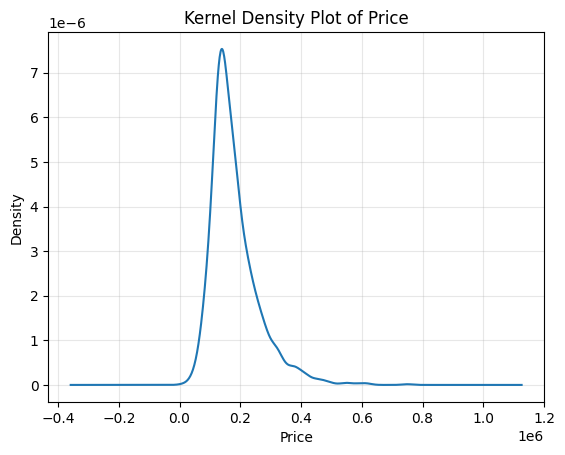

Summary Statistics for Price:
count      2930.000000
mean     180796.060068
std       79886.692357
min       12789.000000
25%      129500.000000
50%      160000.000000
75%      213500.000000
max      755000.000000
Name: price, dtype: float64




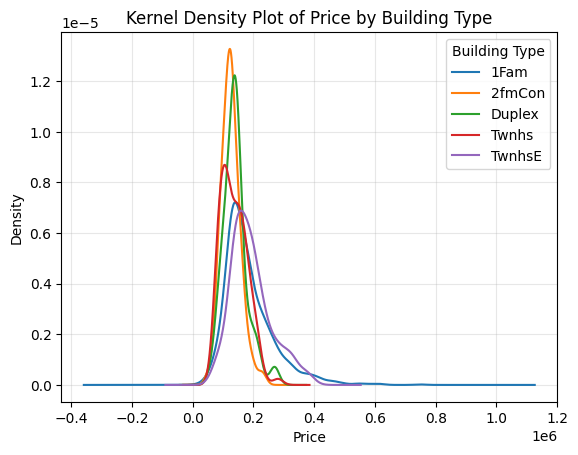


Bldg.Type
TwnhsE    192311.914163
1Fam      184812.041237
Duplex    139808.935780
Twnhs     135934.059406
2fmCon    125581.709677
Name: price, dtype: float64

Bldg.Type
1Fam      6.859451e+09
TwnhsE    4.381346e+09
Twnhs     1.758874e+09
Duplex    1.560169e+09
2fmCon    9.665408e+08
Name: price, dtype: float64


In [ ]:
# 7.2) Make a kernel density plot of price and compute a describe table.
# Now, make a kernel density plot of price conditional on building type, and
# use .groupby() to make a describe type for each type of building.

df['price'].plot.kde()
plt.xlabel('Price')
plt.ylabel('Density')
plt.title('Kernel Density Plot of Price')
plt.grid(True, alpha=0.3)
plt.show()

print("Summary Statistics for Price:")
print(df['price'].describe())
print("\n")

df.groupby('Bldg.Type')['price'].plot.kde()
plt.xlabel('Price')
plt.ylabel('Density')
plt.title('Kernel Density Plot of Price by Building Type')
plt.legend(title='Building Type')
plt.grid(True, alpha=0.3)
plt.show()
print()

# 7.2a) Which building types are the most expensive, on average?
print(df.groupby('Bldg.Type')['price'].mean().sort_values(ascending=False))
# TwnhsE buildings are the most expensive on average.
print()

# 7.2b) Which have the highest variance in transaction prices?
print(df.groupby('Bldg.Type')['price'].var().sort_values(ascending=False))
# 1Fam buildings have the highest variance in transaction prices

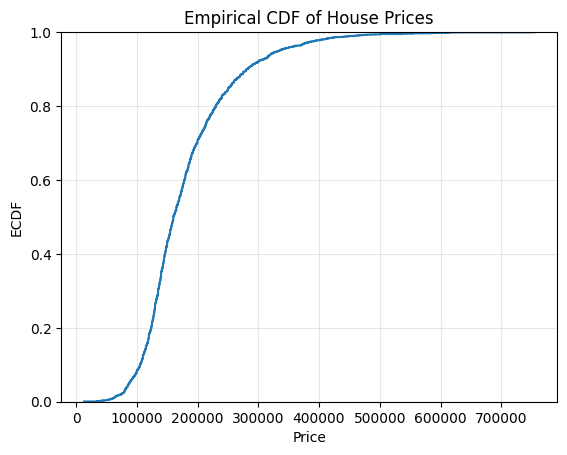

5-Number Summary for Price:
count      2930.000000
mean     180796.060068
std       79886.692357
min       12789.000000
25%      129500.000000
50%      160000.000000
75%      213500.000000
max      755000.000000
Name: price, dtype: float64


In [ ]:
# 7.3) Make an ECDF plot of price, and compute the sample minimum,
# .25 quantile, median, .75 quantile, and sample maximum (i.e. a 5-number summary)
sns.ecdfplot(df['price'])
plt.xlabel('Price')
plt.ylabel('ECDF')
plt.title('Empirical CDF of House Prices')
plt.grid(True, alpha=0.3)
plt.show()

print("5-Number Summary for Price:")
print(df['price'].describe())

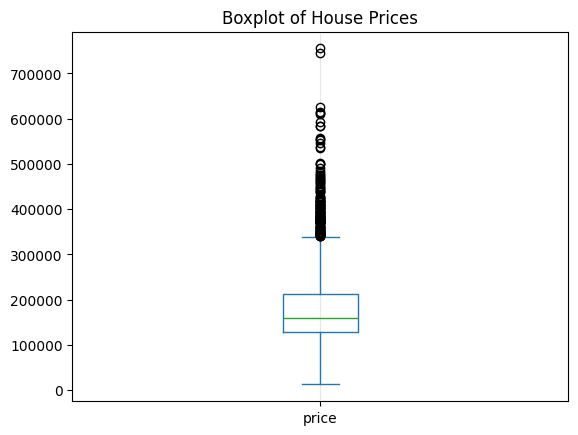

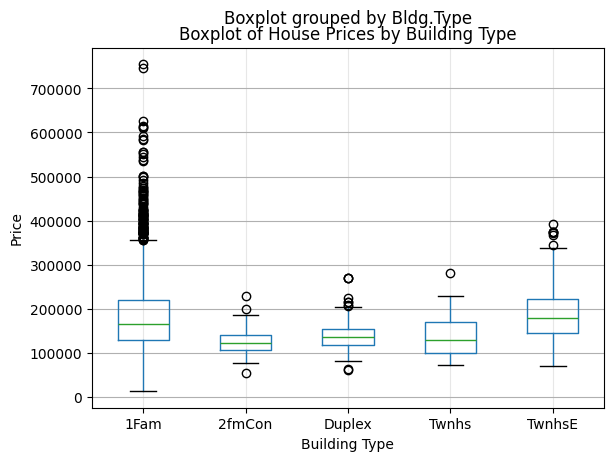

In [ ]:
# 7.4) Make a boxplot of price. Are there outliers?
# Make a boxplot of price conditional on building type. What patterns do you see?

df['price'].plot.box()
plt.title('Boxplot of House Prices')
plt.grid(True, axis='x', alpha=0.3)
plt.show()
print()

# Are there outliers? :

# Yes, there are outliers.
# There are many points above the upper whisker, indicating a large number of high-price outliers

df.boxplot(column='price', by='Bldg.Type')
plt.xlabel('Building Type')
plt.ylabel('Price')
plt.title('Boxplot of House Prices by Building Type')
plt.grid(True, axis='x', alpha=0.3)
plt.show()

# What patterns to you see? :

# Prices clearly differ by building type. Single-family homes are the
# most expensive and the prices vary much more, while multi-family or converted properties
# tend to be cheaper and more tightly clustered. Townhouse end units occupy
# a middle-to-high price tier, reflecting their desirability relative to interior units.

In [ ]:
# 7.5) Make a dummy variable indicating that an observation is an outlier.

Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df['price_outlier'] = ((df['price'] < lower_bound) |
                        (df['price'] > upper_bound)).astype(int)

df['price_outlier'].value_counts()


price_outlier
0    2793
1     137
Name: count, dtype: int64

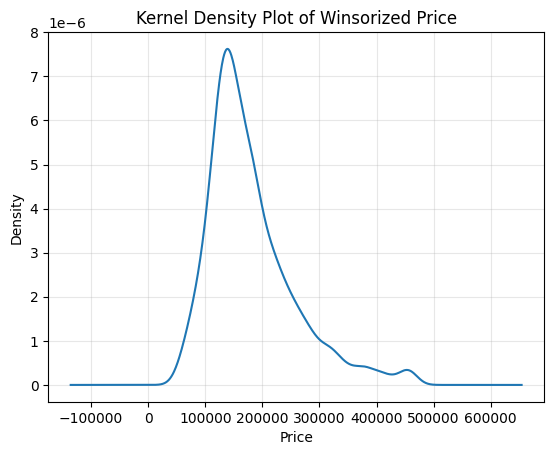

count      2930.000000
mean     180091.154334
std       75842.579174
min       61756.070000
25%      129500.000000
50%      160000.000000
75%      213500.000000
max      456666.370000
Name: price_winsor, dtype: float64

In [ ]:
# 7.6) Winsorize the price variable, and compute a new kernel density plot and
# describe table. How do the results change?

lower_w = df['price'].quantile(0.01)
upper_w = df['price'].quantile(0.99)

df['price_winsor'] = df['price'].clip(lower = lower_w, upper = upper_w)

df['price_winsor'].plot.kde()
plt.xlabel('Price')
plt.ylabel('Density')
plt.title('Kernel Density Plot of Winsorized Price')
plt.grid(True, alpha=0.3)
plt.show()

df['price_winsor'].describe()

# mean decreased slightly (180,786 vs. 180.091)
# std falls noticeably (~$4,000)
# min jumps up from $12.8k -> $61.8k
# max drops sharply from $755k -> $456.7k
# quartiles & median unchanged

# Winsorizing house prices at the 1st and 99th percentiles reduces the influence of
# extreme observations. The mean price decreases slightly and the std falls , indicating
# less dispersion. The median and interquartile range remain unchanged.
# Winsorization primarily affects the tails of the price distribution w/o materially
# altering the central tendency.